# Mapas auto-organizados (SOMs) 


In [2]:
### import packages:
################Pacotes#################
%matplotlib inline
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import matplotlib.colors as colors
########################################

## Dado Sintético:

In [3]:
# read data :
SOM1 = np.loadtxt('../outputs/Sintetico/C1_SOM1.txt', skiprows = 0, unpack = True)  # Mapeamento dos neuronios vitoriosos
print(SOM1.shape)
SOM2 = np.loadtxt('../outputs/Sintetico/C2_SOM2.txt', skiprows = 0, unpack = True)  # Mapeamento das classes dos neuronios vitoriosos
print(SOM2.shape)
SOM3 = np.loadtxt('../outputs/Sintetico/C3_SOM3.txt', skiprows = 0, unpack = True)  # Valores das propriedades dos neuronios vitoriosos
print(SOM3.shape)

(20, 20)
(20, 20)
(20, 20)


In [4]:
### -------create the tabuleiro dos neurons! ----------------###
# get number of neurons in each dimension:
nx = np.size( SOM1[1] )
ny = np.size( SOM1[0] )
print(nx, ny)

# create the tabuleiro based on the number of neurons in each axis:
xn = np.arange(0, nx+1 ) # numero de neuronios + 1 em x ...
yn = np.arange(0, ny+1 ) # ... e em y
Xn,Yn = np.meshgrid(yn,xn)

20 20


In [25]:
# create information for the plot:

namesS1 = ['Non-activated', 'Activated']

namesS2 = ['Shale 2', 'Dolomite', 'Diabase', 'Conglomerate', 'Congl+emb1', 
         'Congl+emb2', 'Congl+emb3', 'Congl+emb4', 'Crystalline','Shale 1' ,'Halite','Granite','Sandstone']

namesS3 = ['RHOB', 'GR', 'SP', 'DT']

limit = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0])
ticks_clean = ['','','','','','','','','','','','','']
titul = 'Self-Organizing Map (SOM)'

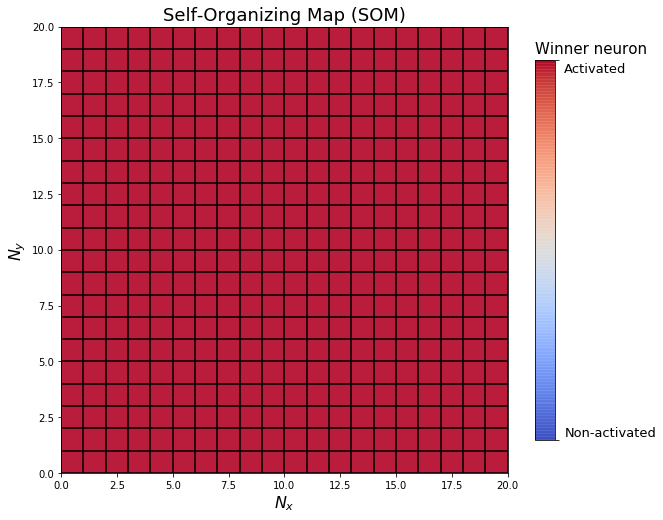

In [26]:
######## Início do treinamento : ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, axes = plt.subplots(nrows=1, ncols=1)
ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
norm = colors.BoundaryNorm(boundaries=limit, ncolors=2)

# area of the plot:
extent = (0, 20, 0, 20)

# plot using imshow:
im1 = plt.imshow(SOM1, cmap=plt.cm.coolwarm, alpha=.9, interpolation='none', extent=extent, 
                 vmin=0.0,vmax=1.0)#, norm=norm)

# get colorbar information:
cb1 = fig.colorbar(im1, shrink=0.70, ticks=[0, 1])

# to clean the ticks of the colorbar:
cb1.ax.set_yticklabels(ticks_clean)

# title of the colorbar:
cb1.ax.set_title('Winner neuron', fontsize = 15 ,loc='left' )

####################### SET the lithologies for each tick of the colorbar manually: #############################
#------------------------------------------------------------------------------------#
plt.annotate(namesS1[0], fontsize=13, xy=(22.5, 1.7), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS1[1], fontsize=13, xy=(22.5, 18.0), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#

# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')


# details aobut the axis:
#ax1.set_xticklabels()
#ax1.set_yticklabels()
ax1.set_ylabel('$N_y$',fontsize=16)
ax1.set_xlabel('$N_x$',fontsize=16)
plt.title(titul,fontsize=18)
plt.show()

fig.savefig('../images/SOMC1_visited_neurons.pdf', dpi=600, transparent=True, bbox_inches='tight')

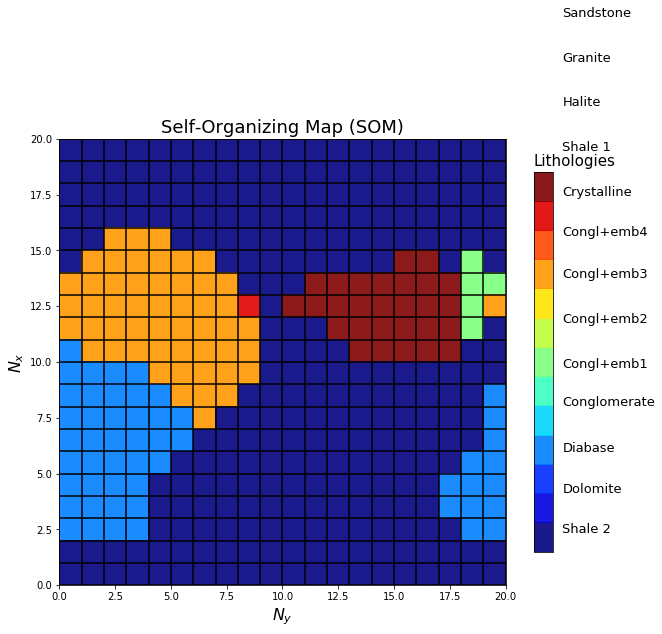

In [31]:
######## Metade do treinamento : ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, axes = plt.subplots(nrows=1, ncols=1)
ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
norm = colors.BoundaryNorm(boundaries=limit, ncolors=256)

# area of the plot:
extent = (0, 20, 0, 20)


# corrigindo o fator de escala do código de rocha
for i in range(0,len(SOM2)):
    for j in range(0,len(SOM2[i])):
        if SOM2[i][j] <= 5:
            SOM2[i][j] = SOM2[i][j]*100
    
#print(SOM2)

#Dicionário de cores de rocha

codigo={1:['#00d34e','shale2'],
        2:['#82a7dd','dolomite'],
        3:['#ff0004','diabase'],
        4:['#ff6004','conglomerate'],
       451:['#f4a15a','ce1'],
       452:['#ffddaa','ce2'],
       453:['#ffd9b7','ce3'],
       454:['#faead6','ce4'],
         5:['#ffbca4','crystalline'],
       6:['#7b7b01' ,'shale1'],
       7:['#173c72' ,'halite'],
       8:['#a70001' ,'granite'],
       9:['#ffe57b' ,'sandstone']}




# plot using imshow:
im1 = plt.imshow(SOM2, plt.get_cmap('jet', 13), alpha=0.9, interpolation=None, extent=extent, 
                 vmin=100.0,vmax=500.0)#, norm=norm)

# get colorbar information:
cb1 = fig.colorbar(im1, shrink=0.70, ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.0, 11.0, 12.0, 13.0])

# to clean the ticks of the colorbar:
cb1.ax.set_yticklabels(ticks_clean)

#title of the colorbar:
cb1.ax.set_title('Lithologies', fontsize = 15 ,loc='left' )

####################### SET the lithologies for each tick of the colorbar manually: #############################
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[0], fontsize=13, xy=(22.5, 2.4), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[1], fontsize=13, xy=(22.5, 4.2), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[2], fontsize=13, xy=(22.5, 6.0), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[3], fontsize=13, xy=(22.5, 8.1), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[4], fontsize=13, xy=(22.5, 9.8), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[5], fontsize=13, xy=(22.5, 11.8), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[6], fontsize=13, xy=(22.5, 13.8), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[7], fontsize=13, xy=(22.5, 15.7), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[8], fontsize=13, xy=(22.5, 17.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[9], fontsize=13, xy=(22.5, 19.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[10], fontsize=13, xy=(22.5, 21.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[11], fontsize=13, xy=(22.5, 23.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS2[12], fontsize=13, xy=(22.5, 25.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#


# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')


# details aobut the axis:
#ax1.set_xticklabels()
#ax1.set_yticklabels()
ax1.set_ylabel('$N_x$',fontsize=16)
ax1.set_xlabel('$N_y$',fontsize=16)
plt.title(titul,fontsize=18)
plt.show()
fig.savefig('../images/SOMC1_lithologies.pdf', dpi=600, transparent=True, bbox_inches='tight')

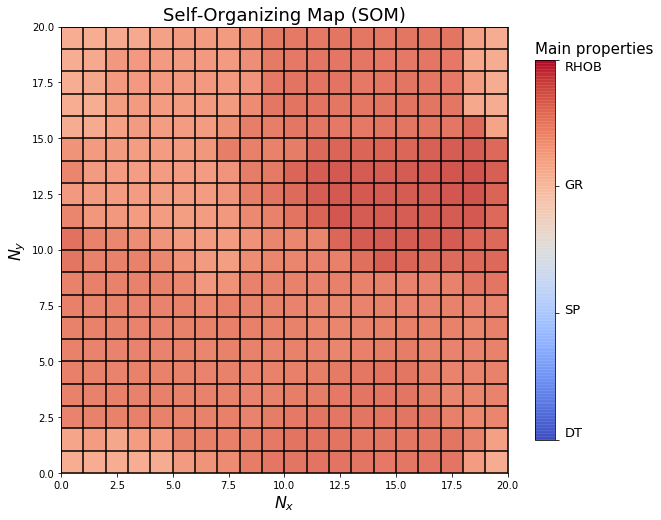

In [15]:
######## Final do treinamento: ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, axes = plt.subplots(nrows=1, ncols=1) 
ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
norm = colors.BoundaryNorm(boundaries=limit, ncolors=1024)

# area of the plot:
extent = (0, 20, 0, 20)

# plot using imshow:
im1 = plt.imshow(SOM3, cmap=plt.cm.coolwarm, alpha=.9, interpolation='none', extent=extent, 
                 vmin=0.0,vmax=3.0)#, norm=norm)

# get colorbar information:
cb1 = fig.colorbar(im1, shrink=0.70, ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

# to clean the ticks of the colorbar:
cb1.ax.set_yticklabels(ticks_clean)

# title of the colorbar:
cb1.ax.set_title('Main properties', fontsize = 15 ,loc='left' )

####################### SET the lithologies for each tick of the colorbar manually: #############################
#------------------------------------------------------------------------------------#
plt.annotate(namesS3[0], fontsize=13, xy=(22.5, 18.1), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS3[1], fontsize=13, xy=(22.5, 12.8), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS3[2], fontsize=13, xy=(22.5, 7.2), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesS3[3], fontsize=13, xy=(22.5, 1.7), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)


# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')

# details aobut the axis:
#ax1.set_xticklabels()
#ax1.set_yticklabels()
ax1.set_ylabel('$N_y$',fontsize=16)
ax1.set_xlabel('$N_x$',fontsize=16)
plt.title(titul,fontsize=18)
plt.show()

fig.savefig('../images/SOM3C1_properties.pdf', dpi=600, transparent=True, bbox_inches='tight')

|ESTATÍSTICA|          |
|----------|-----------|
|Rede      | 20 x 20   |
|Épocas    |   5000      |
|Erro      |5 (0.716%) |
|Vitoriosos|    400    |
|Máquina   |   6,86 s  |

# Dado Real:

In [9]:
# read data :
SOM1REAL = np.loadtxt('../outputs/saida1REAL.txt', skiprows = 0, unpack = True)  # stage 0
print(SOM1REAL.shape)
SOM2REAL = np.loadtxt('../outputs/saida2REAL.txt', skiprows = 0, unpack = True)  # stage 1
print(SOM2REAL.shape)
SOM3REAL = np.loadtxt('../outputs/saida3REAL.txt', skiprows = 0, unpack = True)  # stage 2
print(SOM3REAL.shape)

(20, 20)
(20, 20)
(20, 20)


In [10]:
### -------create the tabuleiro dos neurons! ----------------###
# get number of neurons in each dimension:
nx = np.size( SOM1[0] )
ny = np.size( SOM1[1] )
print(nx, ny)

# create the tabuleiro based on the number of neurons in each axis:
xn = np.arange(0, nx+1 ) # numero de neuronios + 1 em x ...
yn = np.arange(0, ny+1 ) # ... e em y
Xn,Yn = np.meshgrid(xn,yn)

20 20


In [11]:
# create information for the plot:

namesSR1 = ['Perdedor', 'Vencedor']

namesSR2 = ['Calcilutito', 'Marga', 'Diamictito', 'Arenito', 'Argilito', 'Siltito', 'Folhelho', 'Diabasio','Basalto' ]

namesSR3 = [ 'Raio-gama','Densidade', 'Sonico', 'Potencial-Espontâneo']

limit = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
ticks_clean = ['','','','','','','','','','']
titul = 'Self-Organizing Map (SOM)'

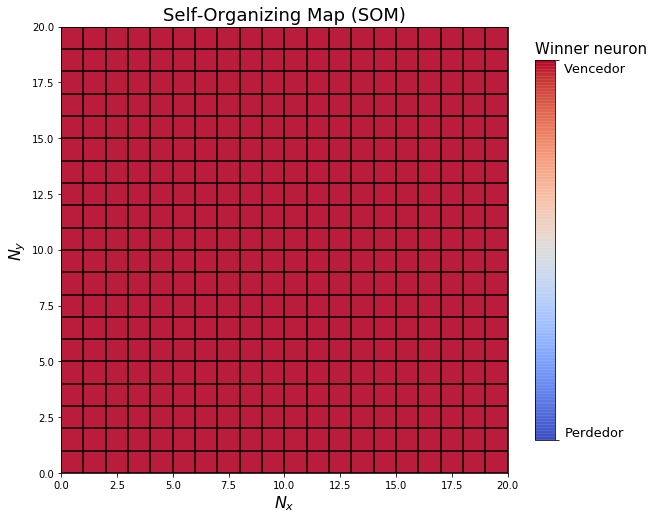

In [12]:
######## início do treinamento : ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, axes = plt.subplots(nrows=1, ncols=1)
ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
norm = colors.BoundaryNorm(boundaries=limit, ncolors=256)

# area of the plot:
extent = (0, 20, 0, 20)


im1 = plt.imshow(SOM1REAL, cmap=plt.cm.coolwarm, alpha=.9, interpolation='none', extent=extent, 
                 vmin=0.0,vmax=1.0)#, norm=norm)



# get colorbar information:
cb1 = fig.colorbar(im1, shrink=0.70, ticks=[0, 1])

# to clean the ticks of the colorbar:
cb1.ax.set_yticklabels(ticks_clean)

# title of the colorbar:
cb1.ax.set_title('Winner neuron', fontsize = 15 ,loc='left' )


####################### SET the lithologies for each tick of the colorbar manually: #############################
####################### SET the lithologies for each tick of the colorbar manually: #############################
#------------------------------------------------------------------------------------#
plt.annotate(namesSR1[0], fontsize=13, xy=(22.5, 1.7), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR1[1], fontsize=13, xy=(22.5, 18.0), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')

# details aobut the axis:
#ax1.set_xticklabels( [xn] )
#ax1.set_yticklabels( [yn] )
ax1.set_ylabel('$N_y$',fontsize=16)
ax1.set_xlabel('$N_x$',fontsize=16)
plt.title(titul,fontsize=18)
plt.show()

fig.savefig('../outputs/SOM1real.pdf', dpi=200, transparent=True, bbox_inches='tight')

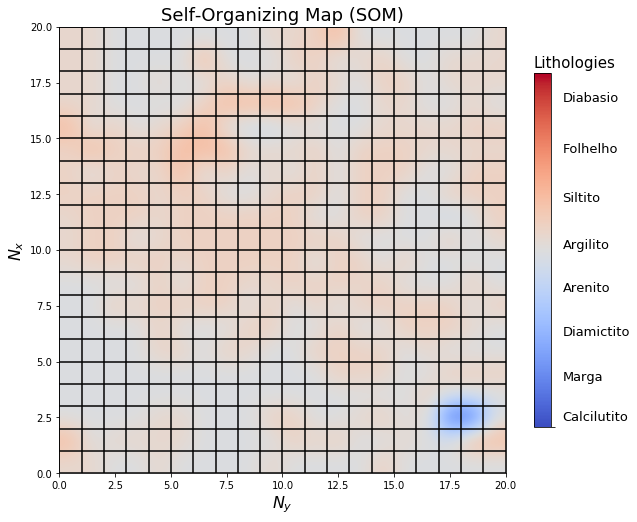

In [33]:
######## Metade do treinamento : ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, axes = plt.subplots(nrows=1, ncols=1)
ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
norm = colors.BoundaryNorm(boundaries=limit, ncolors=256)

# area of the plot:
extent = (0, 20, 0, 20)

    
#print(SOM2)

# plot using imshow:
im2 = plt.imshow(SOM2REAL, cmap=plt.cm.coolwarm, alpha=1, interpolation='bicubic', extent=extent, 
                 vmin=0.0,vmax=100.0)#, norm=norm)

# get colorbar information:
cb2 = fig.colorbar(im2, shrink=0.65, ticks=[0])

# to clean the ticks of the colorbar:
cb2.ax.set_yticklabels(ticks_clean)

#title of the colorbar:
cb2.ax.set_title('Lithologies', fontsize = 15 ,loc='left' )

####################### SET the lithologies for each tick of the colorbar manually: #############################
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[0], fontsize=13, xy=(22.5, 2.4), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[1], fontsize=13, xy=(22.5, 4.2), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[2], fontsize=13, xy=(22.5, 6.2), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[3], fontsize=13, xy=(22.5, 8.2), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[4], fontsize=13, xy=(22.5, 10.1), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[5], fontsize=13, xy=(22.5, 12.2), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[6], fontsize=13, xy=(22.5, 14.4), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR2[7], fontsize=13, xy=(22.5, 16.7), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
#plt.annotate(namesSR2[8], fontsize=13, xy=(22.5, 17.5), xycoords='data',xytext=(1, -1),
#textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#

# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')


# details aobut the axis:
#ax1.set_xticklabels()
#ax1.set_yticklabels()
ax1.set_ylabel('$N_x$',fontsize=16)
ax1.set_xlabel('$N_y$',fontsize=16)
plt.title(titul,fontsize=18)
plt.show()
fig.savefig('../outputs/SOM2REAL.pdf', dpi=200, transparent=True, bbox_inches='tight')

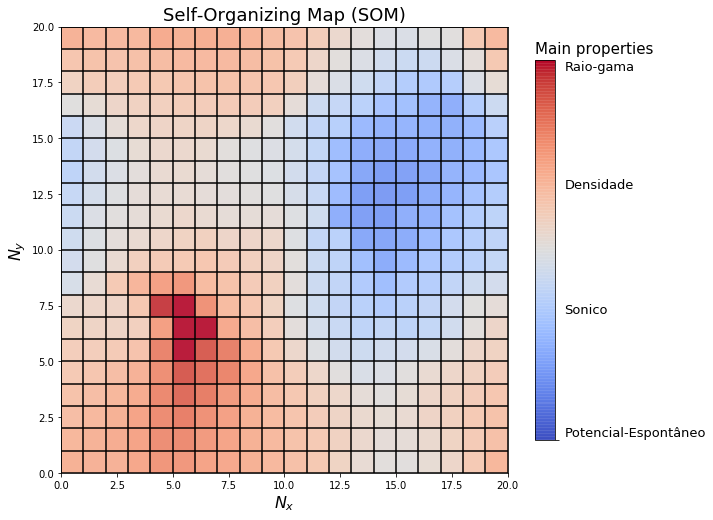

In [46]:
######## Final do treinamento: ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, axes = plt.subplots(nrows=1, ncols=1) 
ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
norm = colors.BoundaryNorm(boundaries=limit, ncolors=1024)

# area of the plot:
extent = (0, 20, 0, 20)

# plot using imshow:
im3 = plt.imshow(SOM3REAL, cmap=plt.cm.coolwarm, alpha=.9, interpolation='none', extent=extent, 
                 vmin=0.0,vmax=100.0)#, norm=norm)

# get colorbar information:
cb3 = fig.colorbar(im3, shrink=0.70, ticks=[0])

# to clean the ticks of the colorbar:
cb3.ax.set_yticklabels(ticks_clean)

# title of the colorbar:
cb3.ax.set_title('Main properties', fontsize = 15 ,loc='left' )

####################### SET the lithologies for each tick of the colorbar manually: #############################
#------------------------------------------------------------------------------------#
plt.annotate(namesSR3[0], fontsize=13, xy=(22.5, 18.1), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR3[1], fontsize=13, xy=(22.5, 12.8), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR3[2], fontsize=13, xy=(22.5, 7.2), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
#------------------------------------------------------------------------------------#
plt.annotate(namesSR3[3], fontsize=13, xy=(22.5, 1.7), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)


# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')

# details aobut the axis:
#ax1.set_xticklabels()
#ax1.set_yticklabels()
ax1.set_ylabel('$N_y$',fontsize=16)
ax1.set_xlabel('$N_x$',fontsize=16)
plt.title(titul,fontsize=18)
plt.show()

fig.savefig('../outputs/SOM3REAL.pdf', dpi=200, transparent=True, bbox_inches='tight')

- ESTATÍSTICA DA REDE

|DADO REAL |           |
|----------|-----------|
|Rede      | 40 x 40   |
|Épocas    |   10000     |
|Erro      |77 (29.84%) |
|Vitoriosos|    400   |
|Máquina   |   213,01 s |
|Banco de dados|13690|
|Dados Classificados| 302|


# FIM.